In [50]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.stats import mode
from statsmodels.robust import mad
from numpy.random import normal

# Include the utils functions
import os
import sys
sys.path.insert(0, os.path.abspath('./'))
from utils import *

import warnings
warnings.filterwarnings('ignore')

boxcar_window_size = 3001
matched_filter_window_length = (3000./3600)
matched_filter_depth = 1./np.pi
matched_filter_fwhm = 1./3600
detection_threshold = 5.
matched_filter_num_fwhm = 15

dr="/Users/bjackson/Downloads/ps_bundle/data_calibrated"

aspect_ratio = 16./9 # On HD projectors nowadays, this is the aspect ratio.
                     # so I make my figures using that ratio so they show up nicely in presentations.
BoiseState_blue = "#0033A0"
BoiseState_orange = "#D64309"

476.0
0.13307 0.2084205 0.562825
66.0
395.0
30.0
[0.510427]


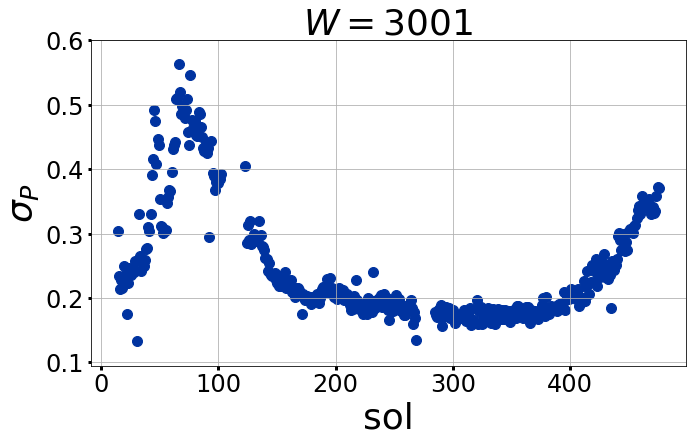

In [4]:
# 2020 Aug 5 - Cycle through all available sols and figure out which ones have the largest and smallest scatters
sols = range(14, 477)

new_filename = "filtered_pressure_scatter.csv"
# f = open(new_filename, "w")
# f.write("# sol, scatter\n")

# stds = np.array([])
# for cur_sol in sols:
# for cur_sol in [66]:
#     try:
#         LTST, LTST_and_sol, sol_data = retrieve_pressure_data(cur_sol, dr=dr)

#         pressure_filter, st = boxcar_filter(LTST, LTST_and_sol, sol_data, boxcar_window_size)
#     pressure_filter = savgol_filter(sol_data["PRESSURE"], boxcar_window_size, 0, mode='interp')

#         plt.plot(LTST_and_sol, (sol_data["PRESSURE"] - pressure_filter), marker='.', ls='')
#         plt.plot(LTST_and_sol, sol_data["PRESSURE"], marker='.', ls='')
#         plt.plot(LTST_and_sol, pressure_filter, marker='.', ls='')
    
#     plt.plot(LTST_and_sol[ind], np.ones_like(LTST_and_sol[ind])*np.nanmedian(sol_data["PRESSURE"]), marker='o')
#         plt.plot(LTST_and_sol, pressure_filter, marker='.', ls='')

#     cur_std = np.nanstd(sol_data['PRESSURE'] - pressure_filter)
#     write_str = "%i, %g" % (cur_sol, cur_std)
#     print(write_str)
#         f.write(write_str + "\n")

#         stds = np.append(stds, cur_std)

#     except:
#         print(cur_sol)
#         pass

# f.close()

data = np.genfromtxt(new_filename, delimiter=',', comments='#', names=True)

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)
ax.scatter(data['sol'], data['scatter'], color=BoiseState_blue, s=100)

print(data['sol'][-1])

ax.grid(True)
ax.set_title(r'$W = $%i' % boxcar_window_size, fontsize=36)
ax.set_xlabel("sol", fontsize=36)
ax.set_ylabel(r'$\sigma_P$', fontsize=36)
ax.tick_params(labelsize=24)

print(np.min(data['scatter']), np.median(data['scatter']), np.max(data['scatter']))
print(data['sol'][np.argmax(data['scatter'])])
print(data['sol'][np.argmin(np.abs(data['scatter'] - np.median(data['scatter'])))])
print(data['sol'][np.argmin(data['scatter'])])
print(data['scatter'][data['sol'] == 65])

max_sol = int(data['sol'][np.argmax(data['scatter'])])
med_sol = int(data['sol'][np.argmin(np.abs(data['scatter'] - np.median(data['scatter'])))])
min_sol = int(data['sol'][np.argmin(data['scatter'])])

# fig.savefig(new_filename.replace("csv", "png"), dpi=500, bbox_inches='tight')

0.9843920333989177


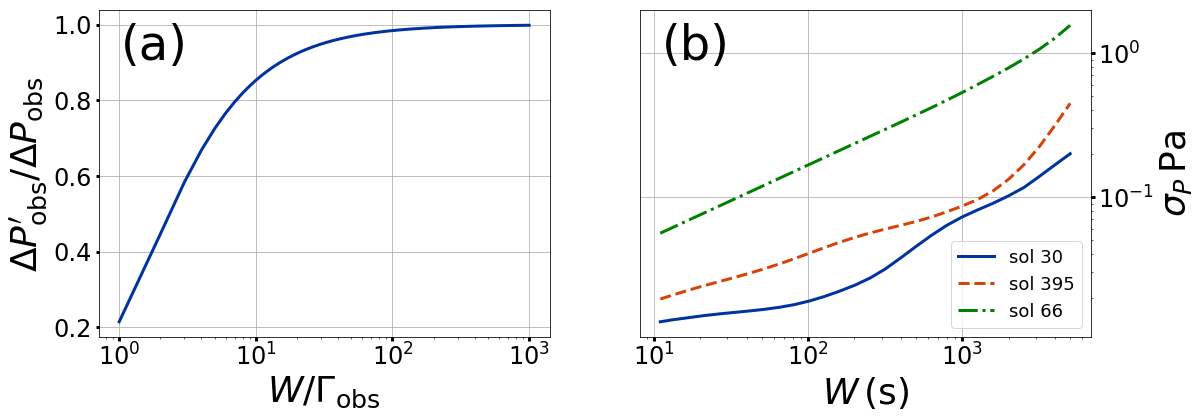

In [14]:
fig = plt.figure(figsize=(10*aspect_ratio, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# plt.setp(ax2.get_yticklabels(), visible=False)

# This calculation reflects the change in Delta P from the Savitsky-Golay filter

x = np.linspace(1, 1000, 1000)
f = 1. - np.arctan(x)/x
ax1.semilogx(x, f, color=BoiseState_blue, lw=3)
print(f[np.argmin(np.abs(x - 100.))])

ax1.set_xlabel(r'$W/\Gamma_{\rm obs}$', fontsize=36)
ax1.set_ylabel(r'$\Delta P_{\rm obs}^\prime/\Delta P_{\rm obs}$', fontsize=36)
ax1.grid(True)
ax1.tick_params(labelsize=24)
ax1.text(0.05, 0.85, "(a)", fontsize=48, transform=ax1.transAxes)

### (b) ###

sol = min_sol
LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
LTST_and_sol -= 24.*sol

delta_t = np.max(LTST_and_sol[1:] - LTST_and_sol[0:-1])
min_window_size = np.log10(10./3600)
max_window_size = np.log10(5000./3600)
window_lengths_int = np.ceil((10**(np.arange(min_window_size, max_window_size + 0.1, 0.1))/delta_t)) // 2 * 2 + 1 
window_lengths = window_lengths_int*delta_t*3600.

stds = np.array([])
for i in range(len(window_lengths)):
    pressure_filter = savgol_filter(sol_data['PRESSURE'], window_lengths_int[i], 0, mode='nearest')
    stds = np.append(stds, np.std(sol_data['PRESSURE'] - pressure_filter))
ax2.loglog(window_lengths, stds, color=BoiseState_blue, lw=3, label="sol %i" % min_sol)

sol = med_sol
LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
LTST_and_sol -= 24.*sol
stds = np.array([])
for i in range(len(window_lengths)):
    pressure_filter = savgol_filter(sol_data['PRESSURE'], window_lengths_int[i], 0, mode='nearest')
    stds = np.append(stds, np.std(sol_data['PRESSURE'] - pressure_filter))
ax2.loglog(window_lengths, stds, color=BoiseState_orange, lw=3, ls='--', label="sol %i" % med_sol)

sol = max_sol
LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr, nans_in_gaps=False)
LTST_and_sol -= 24.*sol
stds = np.array([])
for i in range(len(window_lengths)):
    pressure_filter = savgol_filter(sol_data['PRESSURE'], window_lengths_int[i], 0, mode='nearest')
    stds = np.append(stds, np.std(sol_data['PRESSURE'] - pressure_filter))
ax2.loglog(window_lengths, stds, color='green', lw=3, ls='-.', label="sol %i" % max_sol)

ax2.legend(loc="lower right", fontsize=18)

ax2.set_xlabel(r'$W\,\left( {\rm s} \right)$', fontsize=36)
ax2.set_ylabel(r'$\sigma_P\,{\rm Pa}$', fontsize=36)
ax2.grid(True)
ax2.tick_params(labelsize=24)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.text(0.05, 0.85, "(b)", fontsize=48, transform=ax2.transAxes)
 
# fig.savefig("../figures/Pobsprime-sigmaP_vs_W.png", dpi=500, bbox_inches="tight")

[]


ValueError: attempt to get argmin of an empty sequence

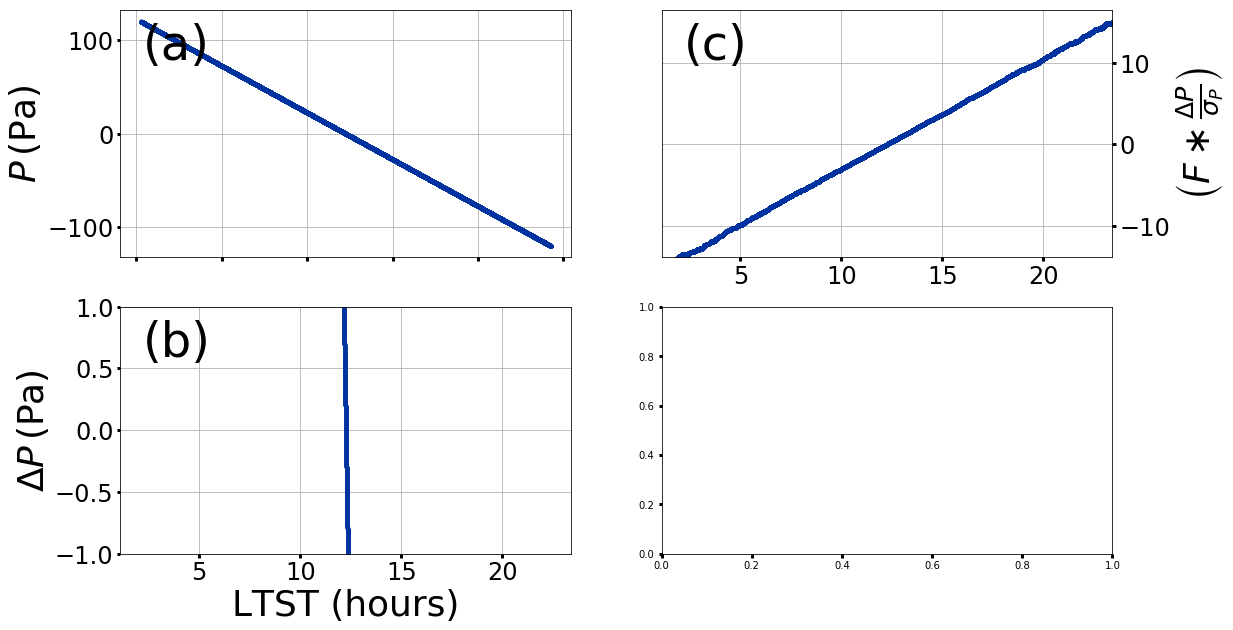

In [9]:
# The sol with the deepest vortex, as reported by Spiga et al. (2020)
# sol = 65
sol = 323
LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
LTST_and_sol -= 24.*sol
    
delta_t = np.max(LTST_and_sol[1:] - LTST_and_sol[0:-1])

# Generate synthetic data
baseline = 0.
slope = -10.
t0 = np.median(LTST_and_sol)
sol_data['PRESSURE'] = modified_lorentzian(LTST_and_sol, 
baseline, slope, t0, matched_filter_depth, matched_filter_fwhm) +\
    normal(scale=matched_filter_depth/5., size=LTST_and_sol.shape)

fig = plt.figure(figsize=(10*aspect_ratio, 10))

### Raw Data ###

ind = (LTST_and_sol > np.min(LTST_and_sol) + boxcar_window_size*delta_t) &\
        (LTST_and_sol < np.max(LTST_and_sol) - boxcar_window_size*delta_t)

ax1 = fig.add_subplot(221)
ax1.plot(LTST_and_sol, sol_data['PRESSURE'], marker='.', ls='', color=BoiseState_blue)
ax1.text(0.05, 0.8, "(a)", fontsize=48, transform=ax1.transAxes)
ax1.grid(True)
ax1.tick_params(labelsize=24, labelbottom=False)
ax1.set_ylabel(r'$P\,\left({\rm Pa}\right)$', fontsize=36)

### Filtered Data ###

ax2 = fig.add_subplot(223)
filtered_pressure, st = boxcar_filter(LTST, LTST_and_sol, sol_data, boxcar_window_size)

ax2.plot(LTST_and_sol, filtered_pressure, marker='.', ls='', color=BoiseState_blue)
ax2.text(0.05, 0.8, "(b)", fontsize=48, transform=ax2.transAxes)
ax2.grid(True)
ax2.tick_params(labelsize=24)
ax2.set_xlabel("LTST (hours)", fontsize=36)
ax2.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

ax2.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
# ax2.set_ylim([0.9*np.min(filtered_pressure[ind]), 1.1*np.max(filtered_pressure[ind])])
ax2.set_ylim([-1, 1])

### Matched Filter ###

# Convolve with Lorentzian

convolution = apply_lorentzian_matched_filter(LTST_and_sol, filtered_pressure, st, 
                                              matched_filter_fwhm, matched_filter_depth, boxcar_window_size)
med = np.nanmedian(convolution)
md = mad(convolution)

ax3 = fig.add_subplot(222)
ax3.plot(LTST_and_sol, convolution, color=BoiseState_blue, ls='', marker='.')
ax3.axhline(med + detection_threshold*md, color=BoiseState_orange, ls='--', lw=6, zorder=-1)
ax3.text(0.05, 0.8, "(c)", fontsize=48, transform=ax3.transAxes)
ax3.grid(True)
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.tick_params(labelsize=24, labelleft=False, labelright=True)

ax3.set_ylabel(r'$\left( F \ast \frac{\Delta P}{\sigma_P} \right)$', fontsize=36)
# ax3.set_xlabel("LTST (hours)", fontsize=36)
ax3.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
ax3.set_ylim([0.9*np.min(convolution[ind]), 1.1*np.max(convolution[ind])])

### Fit Vortex ###
ax4 = fig.add_subplot(224)

ex, pk_wds = find_vortices(LTST_and_sol, convolution, detection_threshold=detection_threshold)
print(ex)
for cur_ex in ex:
    ax2.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    ax3.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    
# Take largest one
# mx_ind = np.argmax(convolution[ex])
mx_ind = np.argmin(convolution[ex])
# mx_ind = np.argmin(np.abs(convolution[ex] - np.median(convolution[ex])))
# mx_ind = 7
mx_width = int(pk_wds[mx_ind])

# Use original, unfiltered data
vortex = np.array([LTST_and_sol[ex[mx_ind] - matched_filter_num_fwhm*mx_width:
                                ex[mx_ind] + matched_filter_num_fwhm*mx_width], 
                   sol_data['PRESSURE'][ex[mx_ind] - matched_filter_num_fwhm*mx_width:
                                        ex[mx_ind] + matched_filter_num_fwhm*mx_width]])

errs = st[ex[mx_ind] - matched_filter_num_fwhm*mx_width: ex[mx_ind] + matched_filter_num_fwhm*mx_width]

init_params = determine_init_params(vortex)
bounds = determine_bounds(vortex, init_params)

popt, uncertainties = fit_vortex(vortex, init_params, bounds, rescale_uncertainties=True, zoomed_in=None)

ax4.errorbar((vortex[0] - popt[2])*3600, vortex[1] - popt[0], yerr=errs, ls='', marker='o', color=BoiseState_blue)
ax4.plot((vortex[0] - popt[2])*3600, modified_lorentzian(vortex[0], *popt) - popt[0], 
         lw=3, color=BoiseState_orange, zorder=-1)

ax4.text(0.05, 0.05, "(d)", fontsize=48, transform=ax4.transAxes)
ax4.text(0.525, 0.1, ("$\\Delta P_{\\rm obs} = $(%.2g$\\pm$%.1g) Pa \n $\\Gamma_{\\rm obs} = $(%.2g$\\pm$%.1g) s" %\
                       (popt[3], uncertainties[3], popt[4]*3600, uncertainties[4]*3600)), 
         fontsize=20, transform=ax4.transAxes)
ax4.grid(True)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.tick_params(labelsize=24, labelleft=False, labelright=True)
ax4.set_xlabel(r'$t - t_0\,\left( {\rm s} \right)$', fontsize=36)
ax4.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

print((np.max(convolution[ex]) - med)/md)

# fig.savefig("../figures/data_conditioning_and_fit.png", dpi=500, bbox_inches='tight')

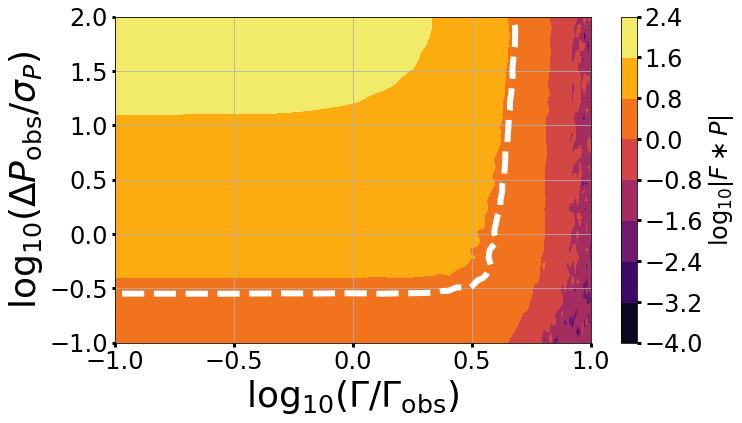

In [12]:
# sol = 65
sol = 323
# LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
# LTST_and_sol -= 24.*sol
    
delta_t = np.max(LTST_and_sol[1:] - LTST_and_sol[0:-1])

# Generate synthetic data
baseline = 0.
slope = 0.
t0 = np.median(LTST_and_sol)

time = np.arange(-20.*matched_filter_fwhm, 20.*matched_filter_fwhm, delta_t) + t0

num_factors = 50
num_simulations = 200
noise_factors = 10**(np.linspace(2.2, -1.5, num_factors))
width_factors = np.linspace(0.1, 10., num_factors)

# recovery = np.zeros([num_simulations, num_factors, num_factors])
# for i in range(num_simulations):
#     for j in range(num_factors):
#         for k in range(num_factors):
#             data = modified_lorentzian(time, baseline, slope, t0, matched_filter_depth, matched_filter_fwhm) +\
#             normal(scale=matched_filter_depth/noise_factors[k], size=time.shape)
            
#             convolution =\
#                 apply_lorentzian_matched_filter(time, data, matched_filter_depth/noise_factors[k], 
#                                                 matched_filter_fwhm*width_factors[j], matched_filter_depth)
#             # What convolution do you get for the peak?
#             ind = np.argmin(np.abs(time - t0))
            
#             med = np.median(convolution)
#             md = mad(convolution)
#             recovery[i,j,k] = (convolution[ind] - med)/md
            
X, Y = np.meshgrid(np.log10(width_factors), np.log10(noise_factors))
fig = plt.figure(figsize=(6*aspect_ratio, 6))
# ax = fig.add_subplot(111)

# cp = ax.contourf(X, Y, np.log10(np.mean(recovery, axis=0)))
# fig.colorbar(cp) # Add a colorbar to a plot

CS = plt.contour(X, Y, np.log10(np.abs(np.mean(recovery, axis=0))), 
                 levels = [np.log10(5)], linewidths=(6,), colors=('white'), linestyles=("--"))
# CS = plt.contourf(X, Y, np.log10(np.mean(recovery, axis=0)), 
#                   np.array([np.log10(1), np.log10(3), np.log10(5), 
#                             np.log10(10), np.log10(30), np.log10(50), 
#                             np.log10(100), np.log10(300)]), cmap='inferno')
CS = plt.contourf(X, Y, np.log10(np.abs(np.mean(recovery, axis=0))), cmap='inferno')

CB = plt.colorbar(CS, extend='both')
CB.ax.tick_params(labelsize=24) 
CB.set_label(r'$\log_{10} | F\ast P |$', fontsize=24)
plt.ylim([-1, 2])

plt.tick_params(labelsize=24)
plt.xlabel(r'$\log_{10} \left( \Gamma/\Gamma_{\rm obs} \right)$', fontsize=36)
plt.ylabel(r'$\log_{10} \left( \Delta P_{\rm obs}/\sigma_P \right)$', fontsize=36)

plt.grid(True)

# plt.semilogx(1/noise_factors, np.mean(recovery[:,:,0], axis=0))
# plt.semilogx(matched_filter_depth/noise_factors, np.mean(recovery[:,:,1], axis=0))
# plt.semilogx(matched_filter_depth/noise_factors, np.mean(recovery[:,:,2], axis=0))

# sol_data['PRESSURE'] = modified_lorentzian(LTST_and_sol, 
#                                            baseline, slope, t0, matched_filter_depth, matched_filter_fwhm) +\
#     normal(scale=matched_filter_depth/5., size=LTST_and_sol.shape)

fig.savefig("../figures/vortex_recovery.png", dpi=500, bbox_inches="tight")

395
11.618632619452177


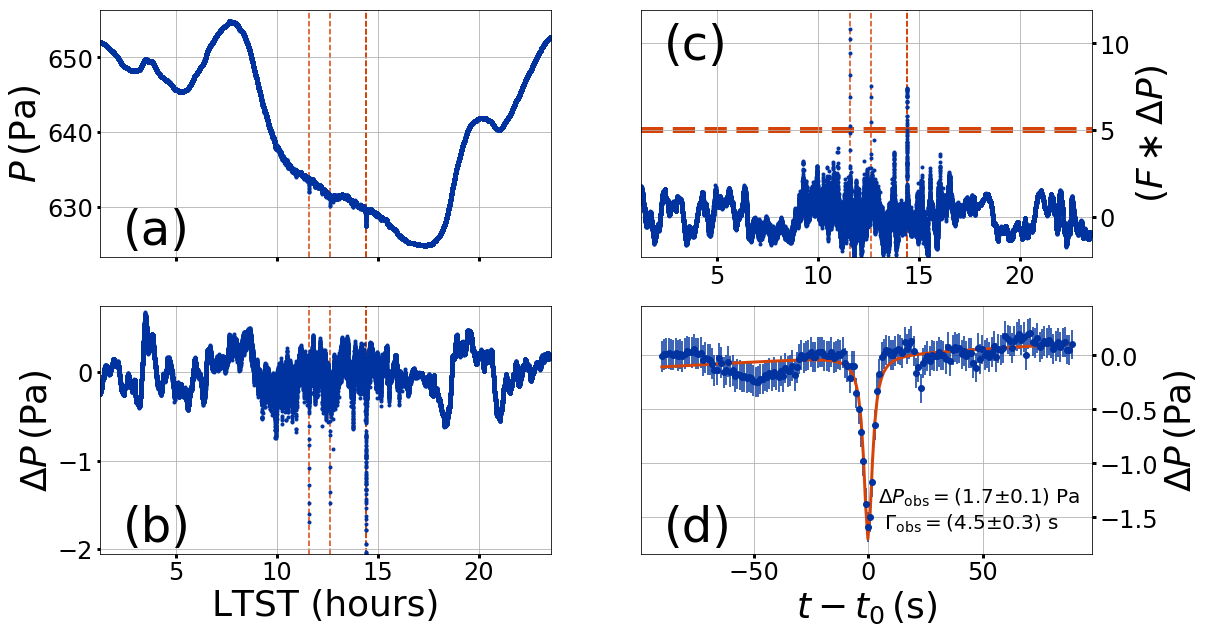

In [33]:
# The sol with the deepest vortex, as reported by Spiga et al. (2020)
# sol = 65
# sol = 323
sol = med_sol

print(sol)

LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
LTST_and_sol -= 24.*sol
    
delta_t = np.max(LTST_and_sol[1:] - LTST_and_sol[0:-1])

fig = plt.figure(figsize=(10*aspect_ratio, 10))

### Raw Data ###

ind = (LTST_and_sol > np.min(LTST_and_sol) + boxcar_window_size*delta_t) &\
        (LTST_and_sol < np.max(LTST_and_sol) - boxcar_window_size*delta_t)

ax1 = fig.add_subplot(221)
ax1.plot(LTST_and_sol, sol_data['PRESSURE'], marker='.', ls='', color=BoiseState_blue)
ax1.text(0.05, 0.05, "(a)", fontsize=48, transform=ax1.transAxes)
ax1.grid(True)
ax1.tick_params(labelsize=24, labelbottom=False)
ax1.set_ylabel(r'$P\,\left({\rm Pa}\right)$', fontsize=36)

### Filtered Data ###

ax2 = fig.add_subplot(223, sharex=ax1)

pressure_filter, st = boxcar_filter(LTST, LTST_and_sol, sol_data, boxcar_window_size)
filtered_pressure = sol_data["PRESSURE"] - pressure_filter

ax2.plot(LTST_and_sol, filtered_pressure, marker='.', ls='', color=BoiseState_blue)
ax2.text(0.05, 0.05, "(b)", fontsize=48, transform=ax2.transAxes)
ax2.grid(True)
ax2.tick_params(labelsize=24)
ax2.set_xlabel("LTST (hours)", fontsize=36)
ax2.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

ax2.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
ax2.set_ylim([0.9*np.min(filtered_pressure[ind]), 1.1*np.max(filtered_pressure[ind])])
# ax2.set_ylim([-1, 1])

### Matched Filter ###

# Convolve with Lorentzian

convolution = apply_lorentzian_matched_filter(LTST_and_sol, filtered_pressure, st, 
                                                      matched_filter_fwhm, matched_filter_depth, boxcar_window_size)
med = np.median(convolution)
md = mad(convolution)

convolution -= med
convolution /= md

ax3 = fig.add_subplot(222)
ax3.plot(LTST_and_sol, convolution, color=BoiseState_blue, ls='', marker='.')
ax3.axhline(detection_threshold, color=BoiseState_orange, ls='--', lw=6, zorder=-1)
ax3.text(0.05, 0.8, "(c)", fontsize=48, transform=ax3.transAxes)
ax3.grid(True)
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.tick_params(labelsize=24, labelleft=False, labelright=True)

ax3.set_ylabel(r'$\left( F \ast \Delta P \right)$', fontsize=36)
# ax3.set_xlabel("LTST (hours)", fontsize=36)
ax3.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
# ax3.set_xlim([8., 10.])
ax3.set_ylim([0.9*np.min(convolution[ind]), 1.1*np.max(convolution[ind])])

### Fit Vortex ###
ax4 = fig.add_subplot(224)

ex, pk_wds = find_vortices(LTST_and_sol, convolution, detection_threshold=detection_threshold)
for cur_ex in ex:
    ax1.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    ax2.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    ax3.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    
# Take largest one
mx_ind = np.argmax(convolution[ex])

# Take the smallest one
# mx_ind = np.argmin(convolution[ex])

# mx_ind = np.argmin(np.abs(convolution[ex] - np.median(convolution[ex])))
# mx_ind = 7
mx_width = np.max([2, int(pk_wds[mx_ind])])

# Use original, unfiltered data
vortex = np.array([LTST_and_sol[ex[mx_ind] - matched_filter_num_fwhm*mx_width:
                                ex[mx_ind] + matched_filter_num_fwhm*mx_width], 
                   sol_data['PRESSURE'][ex[mx_ind] - matched_filter_num_fwhm*mx_width:
                                        ex[mx_ind] + matched_filter_num_fwhm*mx_width]])

errs = st[ex[mx_ind] - matched_filter_num_fwhm*mx_width: ex[mx_ind] + matched_filter_num_fwhm*mx_width]

init_params = determine_init_params(vortex)
bounds = determine_bounds(vortex, init_params)

popt, uncertainties = fit_vortex(vortex, init_params, bounds, rescale_uncertainties=True, zoomed_in=None)
print(popt[2])

ax4.errorbar((vortex[0] - popt[2])*3600, vortex[1] - popt[0], 
             yerr=errs, ls='', marker='o', color=BoiseState_blue)
ax4.plot((vortex[0] - popt[2])*3600, modified_lorentzian(vortex[0], *popt) - popt[0], 
         lw=3, color=BoiseState_orange)

# ax4.text(0.05, 0.05, "(d), %g" % matched_filter_num_fwhm, fontsize=48, transform=ax4.transAxes)
ax4.text(0.05, 0.05, "(d)", fontsize=48, transform=ax4.transAxes)
ax4.text(0.525, 0.1, ("$\\Delta P_{\\rm obs} = $(%.1f$\\pm$%.1f) Pa \n $\\Gamma_{\\rm obs} = $(%.1f$\\pm$%.1f) s" %\
                       (popt[3], uncertainties[3], popt[4]*3600, uncertainties[4]*3600)), 
         fontsize=20, transform=ax4.transAxes)
ax4.grid(True)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.tick_params(labelsize=24, labelleft=False, labelright=True)
ax4.set_xlabel(r'$t - t_0\,\left( {\rm s} \right)$', fontsize=36)
ax4.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

fig.savefig("../figures/data_conditioning_and_fit.png", dpi=500, bbox_inches='tight')

In [45]:
# 2020 Aug 8 - Next find all the vortices

# plt.ioff() # turn off showing plot

sols = range(14, 477)
# sols = range(21, 23)

new_filename = "all_vortices_2020Aug9.csv"
# f = open(new_filename, "w")
# f.write("# vortex_number, sol, t0, t0_unc, DeltaP, DeltaP_unc, Gamma, Gamma_unc, "+\
#         "intercept, intercept_unc, slope, slope_inc, convolution\n")

failed_filename = "all_the_sols_we_cannot_see_2020Aug9.txt"
# ff = open(failed_filename, "w")

# for cur_sol in sols[2:3]:
# for cur_sol in sols:
for cur_sol in [23]:
    
    try:
    
        LTST, LTST_and_sol, sol_data = retrieve_pressure_data(cur_sol, dr=dr)
        LTST_and_sol -= 24.*cur_sol

        delta_ts = (LTST_and_sol[1:] - LTST_and_sol[0:-1])
        ind = delta_ts > 0.
        delta_t = mode(delta_ts[ind])[0][0]

        fig = plt.figure(figsize=(10*aspect_ratio, 10))
        fig.suptitle("sol " + str(cur_sol), fontsize=36)

        ### Raw Data ###

        ind = (LTST_and_sol > np.min(LTST_and_sol) + boxcar_window_size*delta_t) &\
                (LTST_and_sol < np.max(LTST_and_sol) - boxcar_window_size*delta_t)

        ax1 = fig.add_subplot(221)
        ax1.plot(LTST_and_sol, sol_data['PRESSURE'], marker='.', ls='', color=BoiseState_blue)
        ax1.text(0.05, 0.05, "(a)", fontsize=48, transform=ax1.transAxes)
        ax1.grid(True)
        ax1.tick_params(labelsize=24, labelbottom=False)
        ax1.set_ylabel(r'$P\,\left({\rm Pa}\right)$', fontsize=36)

        ### Filtered Data ###

        ax2 = fig.add_subplot(223, sharex=ax1)

        pressure_filter, st = boxcar_filter(LTST, LTST_and_sol, sol_data, boxcar_window_size)
        filtered_pressure = sol_data["PRESSURE"] - pressure_filter

        ax2.plot(LTST_and_sol, filtered_pressure, marker='.', ls='', color=BoiseState_blue)
        ax2.text(0.05, 0.05, "(b)", fontsize=48, transform=ax2.transAxes)
        ax2.grid(True)
        ax2.tick_params(labelsize=24)
        ax2.set_xlabel("LTST (hours)", fontsize=36)
        ax2.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

        ax2.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
        ax2.set_ylim([0.9*np.min(filtered_pressure[ind]), 1.1*np.max(filtered_pressure[ind])])
        # ax2.set_ylim([-1, 1])

        ### Matched Filter ###

        # Convolve with Lorentzian

        convolution = apply_lorentzian_matched_filter(LTST_and_sol, filtered_pressure, st, 
                                                              matched_filter_fwhm, matched_filter_depth, boxcar_window_size)
        med = np.median(convolution)
        md = mad(convolution)

        convolution -= med
        convolution /= md

        ax3 = fig.add_subplot(222)
        ax3.plot(LTST_and_sol, convolution, color=BoiseState_blue, ls='', marker='.')
        ax3.axhline(detection_threshold, color=BoiseState_orange, ls='--', lw=6, zorder=-1)
        ax3.text(0.05, 0.8, "(c)", fontsize=48, transform=ax3.transAxes)
        ax3.grid(True)
        ax3.yaxis.set_label_position("right")
        ax3.yaxis.tick_right()
        ax3.tick_params(labelsize=24, labelleft=False, labelright=True)

        ax3.set_ylabel(r'$\left( F \ast \Delta P \right)$', fontsize=36)
        # ax3.set_xlabel("LTST (hours)", fontsize=36)
        ax3.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
        # ax3.set_xlim([8., 10.])
        ax3.set_ylim([0.9*np.min(convolution[ind]), 1.1*np.max(convolution[ind])])

        ### Fit Vortex ###
        ax4 = fig.add_subplot(224)

        ex, pk_wds = find_vortices(LTST_and_sol, convolution, detection_threshold=detection_threshold)

        if(len(ex) > 0):

            # Make a new directory
            new_dir_name = "data_conditioning_figures/sol_" + str(cur_sol)
            if not os.path.exists(new_dir_name):
                os.mkdir(new_dir_name)

            # Sort vortices from weakest to strongest
            srt = np.argsort(convolution[ex])
            srt_ex = ex[srt]
            srt_pk_wds = pk_wds[srt]

            for i in range(len(srt_ex)):
                mx_width = np.max([2, int(srt_pk_wds[i])])

                ax1.axvline(LTST_and_sol[srt_ex[i]], color=BoiseState_orange, zorder=-1, ls='--')
                ax2.axvline(LTST_and_sol[srt_ex[i]], color=BoiseState_orange, zorder=-1, ls='--')
                ax3.axvline(LTST_and_sol[srt_ex[i]], color=BoiseState_orange, zorder=-1, ls='--')

                # Use original, unfiltered data
                vortex = np.array([LTST_and_sol[srt_ex[i] - matched_filter_num_fwhm*mx_width:
                                                srt_ex[i] + matched_filter_num_fwhm*mx_width], 
                                   sol_data['PRESSURE'][srt_ex[i] - matched_filter_num_fwhm*mx_width:
                                                        srt_ex[i] + matched_filter_num_fwhm*mx_width]])

                errs = st[srt_ex[i] - matched_filter_num_fwhm*mx_width: srt_ex[i] + matched_filter_num_fwhm*mx_width]

                init_params = determine_init_params(vortex)
                bounds = determine_bounds(vortex, init_params)

                popt, uncertainties = fit_vortex(vortex, init_params, bounds, rescale_uncertainties=True, zoomed_in=None)

                write_str = "%i, %i, %g, %g, %g, %g, %g, %g, %g, %g, %g, %g, %g" %\
                    (i, cur_sol, popt[2], uncertainties[2], popt[3], uncertainties[3], 
                     popt[4]*3600., uncertainties[4]*3600, 
                     popt[0], uncertainties[0], popt[1], uncertainties[1], convolution[srt_ex[i]],)
                print(write_str)
#                 f.write(write_str + "\n")

                fig2 = plt.figure(figsize=(10*aspect_ratio, 10))
                fig2.suptitle("sol " + str(cur_sol) + ", vortex_number " + str(i), fontsize=36)

                axind = fig2.add_subplot(111)
                axind.errorbar((vortex[0] - popt[2])*3600, vortex[1] - popt[0], 
                               yerr=errs, ls='', marker='o', color=BoiseState_blue)
                axind.plot((vortex[0] - popt[2])*3600, modified_lorentzian(vortex[0], *popt) - popt[0], 
                           lw=3, color=BoiseState_orange)

                solution_str = ("$\\Delta P_{\\rm obs} = (%.1f\\pm%.1f)\\,{\\rm Pa}$ \n" +\
                    "$\\Gamma_{\\rm obs} = (%.1f\\pm%.1f)\\,{\\rm s}$ \n "+\
                    "$t_0 = %.4f\\,{\\rm hrs}\\pm%.3f\\,{\\rm s}$") %\
                (popt[3], uncertainties[3], popt[4]*3600, uncertainties[4]*3600, popt[2], uncertainties[2]*3600)

                axind.text(0.525, 0.1, solution_str, fontsize=20, transform=axind.transAxes)

                axind.grid(True)
                axind.tick_params(labelsize=24)
                axind.set_xlabel(r'$t - t_0\,\left( {\rm s} \right)$', fontsize=36)
                axind.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

                fig2name = new_dir_name + "/sol_%s_vortex_number_%i.png" % (cur_sol, i)
                fig2.savefig(fig2name, dpi=500, bbox_inches="tight")

            # Take largest one
            mx_ind = np.argmax(convolution[ex])

            # Take the smallest one
            # mx_ind = np.argmin(convolution[ex])

            # mx_ind = np.argmin(np.abs(convolution[ex] - np.median(convolution[ex])))
            # mx_ind = 7

            ax4.errorbar((vortex[0] - popt[2])*3600, vortex[1] - popt[0], 
                         yerr=errs, ls='', marker='o', color=BoiseState_blue)
            ax4.plot((vortex[0] - popt[2])*3600, modified_lorentzian(vortex[0], *popt) - popt[0], 
                     lw=3, color=BoiseState_orange)

            # ax4.text(0.05, 0.05, "(d), %g" % matched_filter_num_fwhm, fontsize=48, transform=ax4.transAxes)
            ax4.text(0.05, 0.05, "(d)", fontsize=48, transform=ax4.transAxes)
            ax4.text(0.525, 0.1, ("$\\Delta P_{\\rm obs} = $(%.1f$\\pm$%.1f) Pa \n $\\Gamma_{\\rm obs} = $(%.1f$\\pm$%.1f) s" %\
                                   (popt[3], uncertainties[3], popt[4]*3600, uncertainties[4]*3600)), 
                     fontsize=20, transform=ax4.transAxes)
            ax4.grid(True)
            ax4.yaxis.set_label_position("right")
            ax4.yaxis.tick_right()
            ax4.tick_params(labelsize=24, labelleft=False, labelright=True)
            ax4.set_xlabel(r'$t - t_0\,\left( {\rm s} \right)$', fontsize=36)
            ax4.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

        figname = "data_conditioning_figures/data_conditioning_sol_%s.png" % cur_sol
        fig.savefig(figname, dpi=500, bbox_inches='tight')

    except:
        print("Broken sol: ", cur_sol)
#         ff.write("Broken sol: " + str(cur_sol) + "\n")
        pass

f.close()
ff.close()

0, 14, 12.0302, 0.000106779, 0.698558, 0.0414835, 12.9454, 1.12539, 740.918, 0.00409603, -2.0059, 0.0793729, 5.22843
1, 14, 12.9698, 8.41363e-05, 0.748128, 0.0365456, 12.4003, 0.884024, 735.749, 0.00344728, -5.10432, 0.0636047, 6.31371
2, 14, 12.8427, 3.73416e-05, 1.15952, 0.104944, 2.84131, 0.371845, 736.656, 0.00981517, -12.25, 0.768696, 6.63324
3, 14, 13.3452, 4.87628e-05, 0.973078, 0.121369, 2.7553, 0.502842, 733.722, 0.0124879, -3.20498, 1.20717, 6.99876
4, 14, 14.7407, 7.17016e-05, 1.87495, 0.0698725, 14.1937, 1.10591, 726.575, 0.0504315, 7.59546, 4.84163, 8.4149
5, 14, 14.7408, 5.31937e-05, 1.90901, 0.0487323, 15.1517, 0.815134, 726.631, 0.034514, 15.7736, 3.23825, 11.475
6, 14, 14.7406, 7.10467e-05, 1.94021, 0.0561605, 17.6693, 0.758421, 726.733, 0.00664434, -4.99231, 0.125549, 12.3334
0, 15, 15.1452, 9.43572e-05, 0.588932, 0.0279771, 14.3004, 0.990429, 719.589, 0.0025967, -3.78551, 0.040256, 5.56936
1, 15, 12.4142, 4.84331e-05, 1.23031, 0.0377356, 11.3681, 0.513513, 733.459, 0

0, 29, 15.5358, 0.000144797, 0.589022, 0.0337039, 20.2647, 2.49265, 710.233, 0.0316913, -5.06126, 2.3573, 5.29117
1, 29, 14.5276, 7.15012e-05, 0.535286, 0.069399, 3.96641, 0.736602, 715.726, 0.00408069, -5.6877, 0.102767, 5.31074
2, 29, 12.0562, 2.22133e-05, 1.36342, 0.0704839, 3.16535, 0.240677, 729.411, 0.00678438, 2.1369, 0.526965, 6.36762
3, 29, 11.7469, 0.000210187, 1.40083, 0.231655, 9.06576, 2.7508, 731.697, 0.0944351, -1.53867, 11.9735, 6.55239
4, 29, 13.4367, 4.22988e-05, 1.01555, 0.0379143, 8.15669, 0.448074, 722.1, 0.00404443, -3.72695, 0.141176, 6.78254
5, 29, 15.5359, 0.000112151, 0.685183, 0.0192729, 28.6997, 1.20647, 710.362, 0.00257289, -5.76453, 0.0331522, 7.05201
6, 29, 10.2372, 4.38213e-05, 0.913956, 0.0399842, 7.21004, 0.471539, 740.369, 0.00518582, -4.46019, 0.275788, 8.57069
7, 29, 13.7288, 9.33227e-06, 2.52684, 0.0870366, 1.71253, 0.087527, 720.595, 0.00950859, -5.72381, 1.79901, 8.75681
8, 29, 11.7469, 0.000225244, 1.39816, 0.246512, 9.10785, 2.94337, 731.697, 0

5, 52, 13.2554, 3.69017e-05, 1.4348, 0.0218532, 18.4552, 0.608775, 712.698, 0.0188259, -10.8546, 1.51472, 7.32903
6, 52, 13.2554, 3.1785e-05, 1.47501, 0.0183262, 18.4163, 0.339184, 712.728, 0.00216838, -7.39624, 0.0388744, 7.74938
7, 52, 15.0411, 1.91089e-05, 1.17147, 0.069286, 1.90194, 0.167474, 699.375, 0.00892942, -8.4366, 1.68135, 7.81548
8, 52, 12.3367, 1.1792e-05, 1.83654, 0.0832979, 1.76466, 0.118872, 720.112, 0.00907103, -14.1205, 1.70411, 14.8776
9, 52, 14.9932, 2.84307e-05, 2.7789, 0.0832014, 6.83452, 0.307758, 699.672, 0.0114758, -5.16698, 0.704144, 21.0355
0, 53, 10.3149, 2.43413e-05, 0.675608, 0.0283837, 4.18101, 0.254788, 738.775, 0.00233197, -8.80705, 0.102117, 6.05588
0, 54, 13.0847, 7.35938e-05, 1.20206, 0.0286919, 22.1944, 0.789104, 708.904, 0.00364863, -9.98283, 0.0582945, 8.45489
0, 55, 9.18325, 1.67476e-05, 0.357877, 0.0232948, 2.03542, 0.192196, 745.746, 0.00145712, -8.00487, 0.0971855, 6.57325
1, 55, 10.9403, 2.36908e-05, 0.975351, 0.0260023, 6.39737, 0.25175, 73

2, 81, 13.9636, 3.16332e-05, 1.03477, 0.0371925, 6.33606, 0.33441, 703.486, 0.00385033, -4.79609, 0.164926, 6.06665
3, 81, 12.4241, 7.35874e-05, 1.35083, 0.0328784, 21.7657, 0.781034, 710.688, 0.00363252, -6.36731, 0.0492444, 6.33816
4, 81, 14.6941, 2.59287e-05, 1.4964, 0.0385412, 7.24732, 0.275619, 699.175, 0.00431137, -0.927393, 0.182794, 10.5057
0, 82, 15.5785, 7.83618e-05, 0.860157, 0.0263073, 20.3162, 1.34431, 694.003, 0.0244742, 1.68188, 1.81635, 5.29008
1, 82, 13.8284, 9.9743e-05, 1.25432, 0.0280913, 32.0626, 1.05892, 704.512, 0.00314489, -5.90006, 0.0288208, 5.30167
2, 82, 15.5784, 3.94904e-05, 0.925969, 0.0117098, 22.4805, 0.420396, 694.076, 0.00134403, -3.78342, 0.0188241, 5.61598
0, 83, 12.352, 5.05396e-05, 1.22316, 0.0400404, 11.0033, 0.696616, 707.532, 0.0199526, -3.24062, 2.28971, 5.00525
1, 83, 12.352, 4.80243e-05, 1.22669, 0.0350231, 12.1078, 0.516174, 707.564, 0.00448561, -3.59327, 0.139466, 5.53804
2, 83, 12.083, 1.10126e-05, 1.63977, 0.0239896, 5.41863, 0.116234, 708

4, 129, 14.0706, 0.000239854, 1.51441, 0.177196, 42.7765, 6.10997, 715.244, 0.189165, 32.7292, 6.64004, 5.85059
5, 129, 14.0707, 0.000297409, 1.64833, 0.252473, 47.0232, 7.72489, 715.395, 0.262428, 38.162, 8.88507, 5.92772
6, 129, 14.0701, 0.000162418, 1.13167, 0.0819121, 28.8016, 3.30853, 714.803, 0.090498, 14.2234, 5.22534, 6.32404
7, 129, 14.0669, 0.000114754, 2.25646, 0.0262712, 70.9581, 1.21649, 716.066, 0.00289388, -5.2776, 0.01155, 6.70539
0, 130, 13.6014, 2.23887e-05, 0.727262, 0.0233691, 5.00094, 0.261152, 719.908, 0.00555095, -1.80304, 0.881583, 5.34733
1, 130, 13.9698, 6.36216e-05, 0.626269, 0.0215407, 13.3395, 0.940836, 717.922, 0.0137782, -9.98389, 1.38685, 5.40944
2, 130, 11.8962, 6.33381e-06, 1.04935, 0.068579, 1.39244, 0.117661, 725.764, 0.0035143, -0.930862, 0.661186, 5.42511
3, 130, 13.6014, 1.76288e-05, 0.72156, 0.0195165, 4.68926, 0.18862, 719.893, 0.00239331, -4.21216, 0.179895, 5.49529
4, 130, 13.9699, 6.59291e-05, 0.649343, 0.0206137, 14.9493, 0.708139, 717.957, 

0, 154, 12.9368, 2.03897e-05, 1.18283, 0.0339665, 5.11263, 0.215909, 734.347, 0.00359093, -6.27255, 0.197233, 5.49953
0, 155, 12.394, 1.37433e-05, 2.44909, 0.105837, 2.55247, 0.166197, 735.883, 0.0115401, -2.46344, 1.45426, 11.7299
0, 156, 11.7255, 5.92597e-05, 0.915896, 0.0300748, 12.8852, 0.853761, 736.66, 0.0176196, 18.1842, 1.83996, 5.24368
1, 156, 11.2657, 6.91756e-05, 0.901174, 0.0360358, 12.4548, 0.726936, 737.973, 0.00338459, -2.25202, 0.062855, 5.298
2, 156, 11.7255, 6.02562e-05, 0.928119, 0.0301117, 13.3514, 0.886394, 736.677, 0.0189638, 18.5321, 1.91428, 5.33841
3, 156, 11.724, 0.000315773, 0.60395, 0.0179241, 76.5019, 3.5577, 736.865, 0.00350482, -2.29936, 0.0284435, 5.68454
4, 156, 14.7519, 2.74009e-05, 0.657038, 0.0644139, 1.60219, 0.229139, 727.317, 0.00547122, 6.5843, 0.712732, 6.0956
5, 156, 15.6072, 5.80959e-05, 2.23013, 0.105246, 8.77851, 0.751286, 722.816, 0.0408515, 6.1401, 5.29706, 13.7
6, 156, 15.6072, 3.3702e-05, 2.24908, 0.0588254, 9.27493, 0.362683, 722.861, 0

1, 179, 11.0403, 2.50764e-05, 2.79248, 0.0628255, 8.0231, 0.269437, 748.903, 0.00801278, -6.47832, 0.374136, 11.6022
0, 180, 11.1828, 8.26091e-05, 0.646635, 0.0361244, 10.6409, 0.903656, 746.718, 0.00550294, -2.70794, 0.247834, 5.9607
1, 180, 12.2641, 4.10371e-05, 2.32029, 0.0565734, 11.9854, 0.57709, 744.515, 0.0303473, -11.3389, 3.3328, 11.5215
2, 180, 12.2642, 3.25108e-05, 2.27745, 0.0478896, 11.1304, 0.345395, 744.443, 0.00531741, -0.234657, 0.145084, 11.8943
0, 181, 13.0647, 1.55013e-05, 1.22216, 0.0313243, 4.34543, 0.164919, 743.823, 0.00366846, 2.56039, 0.27809, 6.59935
0, 182, 12.5264, 0.000336727, 0.627083, 0.0275195, 55.239, 3.56994, 745.399, 0.00298451, -0.920998, 0.0155983, 5.339
1, 182, 10.8799, 1.63412e-05, 1.7721, 0.144091, 1.22066, 0.132051, 749.109, 0.00908773, -16.0648, 1.75608, 6.93121
2, 182, 13.2408, 1.43107e-05, 1.78304, 0.135081, 1.16036, 0.113259, 744.625, 0.00759904, -3.08351, 1.46755, 8.46658
0, 185, 12.4828, 0.0017885, 0.532228, 0.0347283, 300, 36.323, 744.47

0, 204, 14.3699, 0.000263093, 0.469132, 0.0579886, 40.2001, 6.44006, 747.313, 0.062577, 6.55759, 2.37292, 5.02375
1, 204, 14.3674, 0.000163301, 0.61528, 0.0513881, 45.9905, 4.44473, 747.48, 0.0547541, -29.0756, 1.67186, 5.03453
2, 204, 14.3678, 0.000186198, 0.590164, 0.0529478, 42.2034, 4.77258, 747.436, 0.0582914, -22.5404, 1.95744, 5.09504
3, 204, 12.9056, 4.49475e-05, 0.912468, 0.0162734, 20.497, 0.780292, 754.778, 0.015609, -14.3127, 1.14718, 5.11225
4, 204, 14.3682, 0.000206364, 0.590855, 0.0591483, 42.491, 5.26545, 747.431, 0.065063, -17.9013, 2.20953, 5.12097
5, 204, 14.3686, 0.000247969, 0.550065, 0.0646742, 40.9179, 6.15698, 747.386, 0.0711169, -11.2311, 2.56447, 5.15145
6, 204, 14.0737, 0.000177729, 0.602429, 0.105833, 7.2844, 1.84106, 748.84, 0.00742215, -3.9321, 0.0210305, 5.15154
7, 204, 15.1206, 0.000246338, 0.446481, 0.0470651, 24.617, 4.73485, 744.424, 0.0499279, -4.79707, 3.31967, 5.23949
8, 204, 13.6279, 0.000112656, 1.22085, 0.0731327, 20.563, 2.17716, 751.045, 0.077

1, 219, 13.9466, 5.41296e-05, 1.68956, 0.144943, 4.54507, 0.57095, 750.334, 0.0143139, -5.24944, 0.793381, 9.56296
0, 220, 10.9066, 2.3329e-05, 1.00536, 0.196432, 1.13924, 0.26175, 757.888, 0.00767471, -11.6252, 1.48039, 5.11473
1, 220, 9.95356, 2.03814e-05, 1.66132, 0.125959, 1.61164, 0.180453, 765.162, 0.0131057, -19.5994, 2.49695, 7.98048
2, 220, 14.1175, 1.65281e-05, 1.50397, 0.0764816, 1.71067, 0.130043, 747.992, 0.00946856, -5.00378, 1.79617, 9.43443
0, 221, 12.8854, 4.21386e-06, 1.7208, 0.206836, 1.11862, 0.143046, 752.453, 0.00495727, -12.7156, 0.936659, 5.90782
1, 221, 14.0417, 6.20837e-05, 1.41723, 0.0465798, 13.7975, 0.941519, 747.657, 0.0320204, 6.17862, 3.14055, 6.14094
2, 221, 14.0416, 4.33327e-05, 1.46366, 0.0309741, 14.8332, 0.658374, 747.718, 0.0214359, -0.946146, 2.03769, 7.20035
3, 221, 14.0417, 6.01433e-05, 1.41975, 0.0446722, 13.7268, 0.888337, 747.657, 0.0283155, 2.99301, 2.83877, 7.85003
4, 221, 14.0416, 5.12811e-05, 1.46727, 0.0377401, 14.354, 0.539033, 747.709,

2, 238, 13.2826, 1.3824e-05, 1.78741, 0.0792951, 2.50441, 0.167191, 751.337, 0.00852852, -1.19183, 1.07658, 10.6109
3, 238, 11.7044, 1.32188e-05, 3.78533, 0.393809, 1.23876, 0.159969, 755.032, 0.0185668, 2.40886, 3.54581, 16.3203
0, 239, 9.38178, 3.32598e-05, 0.592408, 0.0415976, 3.45962, 0.355581, 767.646, 0.00382774, -9.32352, 0.248524, 6.28155
1, 239, 11.6955, 4.24593e-05, 3.84539, 0.162156, 7.202, 0.527273, 754.187, 0.052729, 14.3688, 7.40265, 14.0075
2, 239, 14.8146, 1.71165e-05, 1.5873, 0.0858371, 2.50304, 0.203304, 746.911, 0.00929443, -1.38037, 1.17415, 14.8491
3, 239, 11.6954, 2.31469e-05, 3.87055, 0.0852719, 7.56238, 0.249763, 754.252, 0.0113827, 2.49761, 0.602402, 18.186
0, 240, 9.95914, 5.05264e-05, 0.614062, 0.03135, 7.12497, 0.534389, 763.432, 0.00330264, -9.78796, 0.125868, 6.58763
0, 241, 15.2938, 8.32311e-05, 0.321905, 0.028295, 6.81753, 0.864643, 745.847, 0.0020737, 0.0242751, 0.0460116, 5.50941
1, 241, 14.2274, 0.000105654, 0.844334, 0.0555956, 11.5526, 1.10363, 746.

0, 262, 11.0297, 3.36643e-05, 0.809314, 0.0567696, 3.44538, 0.350615, 748.887, 0.00480603, -0.420163, 0.270962, 6.36922
1, 262, 13.2003, 1.7298e-05, 1.90181, 0.0823291, 1.48852, 0.101348, 742.839, 0.0111122, 8.16042, 2.13483, 11.8196
0, 263, 11.6007, 5.12831e-05, 0.873246, 0.0795677, 4.06793, 0.54132, 747.587, 0.00737129, -0.993379, 0.411351, 5.48279
1, 263, 12.2115, 5.52639e-05, 1.35448, 0.0949806, 5.67432, 0.579985, 745.97, 0.00870535, -8.46738, 0.340289, 5.73292
2, 263, 15.1613, 4.0142e-05, 0.894115, 0.0363348, 7.06624, 0.495752, 739.262, 0.0115209, 6.48741, 1.63591, 6.44638
3, 263, 15.1613, 3.0958e-05, 0.881293, 0.0294351, 6.67332, 0.323931, 739.24, 0.00254965, 3.24261, 0.0771589, 6.58859
4, 263, 10.677, 1.49152e-05, 2.10072, 0.0916838, 2.55559, 0.166497, 749.795, 0.0103384, 0.276767, 1.30542, 11.3019
0, 264, 12.3049, 2.93816e-05, 1.40596, 0.119297, 2.71069, 0.346902, 745.279, 0.0136892, -0.069468, 1.71661, 8.03568
0, 265, 13.3684, 9.35473e-05, 1.50023, 0.0843702, 12.585, 1.47291, 

4, 297, 16.4149, 1.04241e-05, 0.612023, 0.0384197, 1.63919, 0.145122, 715.631, 0.00245006, 3.89825, 0.316679, 6.50457
5, 297, 11.3893, 5.93925e-05, 2.13005, 0.122497, 7.39493, 0.752252, 720.868, 0.043435, -7.7838, 5.85357, 6.73094
6, 297, 10.334, 0.000155022, 0.646885, 0.0419615, 17.159, 1.80405, 725.251, 0.0098196, -0.776305, 0.447743, 9.06623
7, 297, 12.3278, 4.30692e-05, 3.03448, 0.0871746, 10.6847, 0.588941, 717.964, 0.0422883, 33.4998, 4.91534, 9.48242
8, 297, 12.3278, 4.37869e-05, 3.01748, 0.0904626, 10.3985, 0.59175, 717.931, 0.0418578, 34.8742, 4.98013, 11.3641
9, 297, 12.3277, 4.04942e-05, 3.037, 0.0700891, 12.6298, 0.436273, 718.103, 0.00920546, -3.00381, 0.285065, 11.7052
10, 297, 11.3893, 3.67963e-05, 2.13079, 0.0679743, 8.30153, 0.399344, 720.938, 0.00961649, 0.509232, 0.503171, 15.1705
11, 297, 12.6496, 2.02188e-05, 3.94536, 0.0830413, 6.91386, 0.219024, 717.109, 0.0115367, -7.75389, 0.706863, 15.9065
0, 298, 13.4368, 3.15523e-05, 1.12284, 0.0253895, 9.94934, 0.423739, 71

6, 309, 13.8807, 8.24771e-06, 2.80811, 0.122006, 1.83588, 0.116233, 704.55, 0.00915372, 6.99396, 1.17801, 12.7819
0, 310, 10.0231, 4.48377e-05, 0.566266, 0.0486267, 0.976511, 0.167921, 714.161, 0.00565706, -10.4356, 1.0984, 5.00117
1, 310, 13.2878, 0.000125035, 0.643964, 0.0456339, 12.7124, 1.8287, 703.289, 0.0279651, 1.03508, 2.90385, 5.03102
2, 310, 13.2877, 0.000147362, 0.659978, 0.0476198, 14.7046, 1.53239, 703.326, 0.00360771, -2.93139, 0.0385887, 5.3996
3, 310, 11.2264, 0.000193206, 0.598602, 0.0306457, 27.1665, 2.06848, 708.672, 0.00378581, -2.67773, 0.0486551, 5.6616
4, 310, 8.57352, 1.32784e-05, 0.769487, 0.0151681, 4.85077, 0.140335, 723.677, 0.00155946, -9.21449, 0.0857873, 5.8412
5, 310, 11.1046, 2.62327e-05, 2.25767, 1.73629, 0.656741, 0.376791, 708.913, 0.00922481, -21.4658, 1.80388, 9.99607
6, 310, 9.97564, 1.314e-05, 1.79816, 0.0591748, 2.91165, 0.141364, 714.449, 0.00619459, -5.38581, 0.595333, 12.7103
0, 311, 14.7931, 3.39862e-05, 0.739182, 0.0347873, 5.19924, 0.36252

2, 328, 9.33048, 4.39596e-05, 0.645774, 0.301806, 1.00181, 0.493935, 699.413, 0.00793014, -9.58976, 1.53944, 5.69095
3, 328, 9.58491, 6.27198e-05, 1.54455, 6.50166, 0.5, 1.33838, 697.714, 0.0084652, -14.4952, 1.13377, 5.81528
4, 328, 15.0912, 5.463e-05, 0.863947, 0.0169105, 20.0919, 0.58287, 680.576, 0.00198678, 1.5748, 0.0326895, 6.46688
5, 328, 10.6137, 0.000786779, 0.430722, 0.0196398, 147.153, 14.186, 691.933, 0.0202401, -4.29289, 0.204254, 6.70275
6, 328, 12.5805, 5.97236e-06, 3.85682, 0.239549, 1.247, 0.0937382, 685.373, 0.00989694, -5.12055, 1.88129, 16.9448
0, 329, 12.6255, 2.6609e-05, 0.712818, 0.0489821, 2.42732, 0.237889, 683.515, 0.00438418, -6.06898, 0.346854, 5.30614
1, 329, 8.73102, 1.40009e-05, 1.25026, 0.818179, 0.631081, 0.294106, 701.322, 0.00308227, -8.09014, 0.597521, 7.89745
0, 330, 8.88376, 8.51336e-06, 1.16474, 0.0409835, 2.19074, 0.115563, 700.398, 0.00378183, -7.6718, 0.481387, 5.12754
1, 330, 14.0027, 0.00015393, 2.80721, 0.267176, 26.1468, 3.20026, 680.121, 

2, 344, 9.81608, 4.86186e-05, 0.800377, 0.0435616, 6.42971, 0.524346, 679.965, 0.00579939, -8.47016, 0.357566, 8.72078
0, 345, 10.7292, 7.89265e-05, 0.805133, 0.121638, 3.72852, 0.821433, 674.49, 0.0117668, -1.55298, 0.763497, 5.35909
1, 345, 14.3347, 0.000158971, 0.49017, 0.0192881, 29.0641, 1.75811, 666.157, 0.00322024, -0.890664, 0.0597628, 5.42097
2, 345, 11.5955, 2.95506e-05, 0.707038, 0.0595394, 1.83531, 0.22976, 671.782, 0.0080264, 7.08796, 1.51566, 5.51851
3, 345, 9.29018, 1.0278e-05, 0.913882, 0.0502402, 1.79346, 0.142906, 681.297, 0.00367065, -3.48066, 0.473523, 6.09018
4, 345, 11.6238, 8.48782e-05, 0.72678, 0.0676023, 6.56917, 0.903017, 671.783, 0.00764839, 0.736795, 0.364237, 6.99833
5, 345, 15.7143, 5.58252e-05, 0.529187, 0.0477842, 4.44581, 0.643173, 664.796, 0.0104557, -1.21692, 1.70224, 7.82448
6, 345, 15.7143, 4.10236e-05, 0.532363, 0.0345372, 4.55425, 0.444496, 664.801, 0.00476457, -1.85923, 0.438271, 8.1399
7, 345, 13.5948, 2.85572e-05, 1.26334, 0.0423579, 6.13202, 0

6, 360, 11.2138, 1.50102e-05, 1.43557, 0.0843195, 2.1276, 0.186079, 659.571, 0.00786597, -5.05187, 1.00596, 6.81797
7, 360, 12.6658, 0.000126929, 0.849354, 0.050568, 15.3403, 1.39339, 656.711, 0.00794885, -3.42446, 0.25837, 8.60796
8, 360, 11.1232, 1.17098e-05, 1.78681, 0.0706852, 2.4438, 0.145609, 659.866, 0.00738425, -2.28067, 0.933486, 9.528
0, 361, 13.1856, 6.47755e-05, 0.894947, 0.0386989, 10.6599, 0.880134, 653.978, 0.0182888, -2.82436, 2.15031, 5.40295
1, 361, 13.1855, 8.75632e-05, 0.900884, 0.0406891, 13.9573, 0.927226, 654.047, 0.00431701, -1.76879, 0.0873057, 5.53244
2, 361, 11.358, 0.000186015, 0.762301, 0.0282814, 36.0798, 2.03548, 657.423, 0.00435906, -3.24059, 0.057621, 6.07502
0, 362, 12.3528, 7.82443e-05, 1.0376, 0.0443558, 13.1775, 0.825166, 655.374, 0.00442442, -2.93765, 0.0856268, 5.80469
1, 362, 13.6873, 9.99406e-05, 0.60639, 0.0430448, 10.1354, 1.06462, 652.486, 0.00495231, -0.91547, 0.156811, 7.26099
0, 363, 8.83316, 1.18902e-05, 1.02066, 0.0365152, 2.59795, 0.139

1, 379, 14.6265, 2.23997e-05, 0.883265, 0.0666143, 2.43268, 0.2694, 637.779, 0.00470184, -1.07956, 0.311304, 6.5055
0, 380, 14.3393, 3.23169e-05, 3.91742, 0.144251, 6.28737, 0.390907, 637.284, 0.0414076, 14.5547, 6.12344, 14.4613
1, 380, 14.3392, 2.73658e-05, 3.93458, 0.116249, 6.66662, 0.295781, 637.356, 0.0157886, 0.338279, 0.971686, 15.8818
0, 381, 10.3253, 0.000415853, 0.496148, 0.0247032, 62.4832, 6.73948, 647.239, 0.0203667, -1.94476, 0.481773, 5.02603
1, 381, 11.0386, 0.000400263, 0.401118, 0.0150607, 75.8889, 5.58451, 644.401, 0.0079442, -3.37522, 0.134768, 5.10957
2, 381, 11.9358, 3.49108e-05, 1.07255, 0.0756914, 3.56745, 0.36769, 642.574, 0.00711039, 5.14185, 0.462245, 6.87277
3, 381, 11.376, 4.22124e-05, 2.3134, 3.16184, 0.703626, 0.738341, 643.643, 0.0194128, 15.6073, 3.70605, 8.89269
4, 381, 13.8132, 6.00293e-05, 1.3119, 0.0770274, 7.36021, 0.63853, 638.699, 0.00869353, -0.215487, 0.368157, 9.12562
0, 382, 13.6016, 3.17523e-05, 0.897338, 0.0501184, 4.1041, 0.339056, 638.25

1, 397, 9.64168, 0.000417119, 0.359042, 0.0184081, 58.3292, 4.98036, 639.08, 0.00608879, -8.43775, 0.075109, 6.49017
2, 397, 12.6988, 1.85074e-05, 1.95628, 0.188793, 1.63157, 0.227361, 632.073, 0.0161898, -12.602, 3.05506, 10.603
0, 398, 9.03881, 3.12761e-05, 1.30695, 0.1148, 2.63119, 0.340581, 643.356, 0.0112132, -8.33346, 1.08602, 5.77761
0, 399, 12.2148, 5.36181e-05, 1.76353, 0.190708, 3.54957, 0.578403, 630.631, 0.0273611, 6.60095, 1.61951, 5.47028
1, 399, 14.734, 0.00117664, 0.381515, 0.0189344, 169.642, 14.4727, 627.121, 0.00643407, -2.17681, 0.034416, 5.58337
2, 399, 11.2073, 0.000136933, 0.49963, 0.0502949, 9.79229, 1.4623, 631.92, 0.00597104, 0.815513, 0.205217, 6.00282
3, 399, 11.6623, 9.12359e-06, 1.60702, 0.0455397, 2.08663, 0.0883342, 631.523, 0.00605169, 6.23499, 1.12632, 10.053
4, 399, 12.2148, 4.69628e-05, 1.78346, 0.158051, 3.80053, 0.495529, 630.674, 0.0171236, -2.59971, 1.31344, 11.0825
0, 400, 11.5335, 0.000145382, 1.07296, 0.062968, 19.6553, 2.47801, 632.26, 0.0581

2, 419, 14.4194, 0.000140586, 0.908751, 0.0630633, 14.5847, 1.48825, 612.426, 0.00667738, -3.66793, 0.128076, 5.53779
3, 419, 12.144, 3.76535e-05, 0.896575, 0.0560253, 4.34587, 0.393216, 621.587, 0.00442122, -1.79835, 0.175508, 6.0081
4, 419, 10.5439, 4.19804e-05, 1.30272, 0.107624, 3.61825, 0.435231, 627.413, 0.0102499, -6.00205, 0.666258, 8.1977
0, 420, 11.8529, 1.68404e-05, 1.3246, 0.0496592, 3.26877, 0.179957, 622.973, 0.00489664, 0.906511, 0.379729, 8.24844
0, 421, 10.9885, 0.000187659, 1.94706, 0.170081, 18.2216, 3.27456, 623.651, 0.163026, 8.47744, 13.283, 5.68564
1, 421, 10.9885, 0.000163714, 1.87242, 0.136168, 16.6014, 2.58812, 623.549, 0.105547, 8.19012, 9.2432, 9.17849
2, 421, 10.9884, 6.93846e-05, 1.82583, 0.0561001, 16.2529, 0.752028, 623.507, 0.00784229, -4.63027, 0.205451, 13.5278
0, 422, 11.1743, 6.56029e-05, 0.83674, 0.0561249, 7.04162, 0.687486, 621.368, 0.00501979, -5.92732, 0.151125, 5.08897
1, 422, 13.8858, 0.000186906, 3.71733, 0.396752, 25.1801, 3.81479, 611.507,

0, 448, 15.0777, 2.99072e-05, 0.545263, 0.0238496, 4.92373, 0.314745, 606.435, 0.00228775, -3.95878, 0.11123, 6.2755
1, 448, 11.8012, 1.73147e-05, 1.84721, 0.0623394, 3.67618, 0.184084, 621.811, 0.00755782, 0.940943, 0.712415, 13.3973
0, 450, 12.8503, 3.78259e-05, 2.45409, 0.037777, 17.6893, 0.403813, 619.351, 0.00447046, -5.26935, 0.0844997, 9.54123
0, 451, 11.1, 3.56264e-05, 0.727796, 0.0709368, 2.48152, 0.355352, 626.514, 0.00822365, -4.01966, 1.04546, 6.09818
1, 451, 10.4869, 7.31293e-05, 0.718308, 0.0457445, 8.26749, 0.768376, 631.027, 0.00432347, -8.22575, 0.119426, 6.40702
2, 451, 12.8611, 5.10298e-05, 0.994898, 0.067239, 5.43477, 0.545317, 619.12, 0.0080658, -3.74407, 0.507395, 7.72138
0, 453, 9.81367, 2.09873e-05, 1.44964, 0.0556043, 3.92749, 0.237461, 636.978, 0.0111105, -20.274, 1.86142, 8.44511
1, 453, 9.81367, 2.03144e-05, 1.43766, 0.0554971, 3.78167, 0.217104, 636.957, 0.00684447, -18.2658, 0.6423, 8.74527
2, 453, 12.8071, 4.21935e-05, 1.93489, 0.0404409, 14.5225, 0.63243

0, 469, 12.9033, 5.91518e-05, 2.21262, 0.073579, 12.8101, 0.865748, 627.988, 0.0451638, -3.37769, 4.68134, 8.10532
1, 469, 12.9034, 6.12115e-05, 2.20791, 0.0764754, 12.5992, 0.87425, 627.976, 0.0432998, -0.124365, 4.61315, 9.7264
2, 469, 12.9034, 5.60356e-05, 2.20732, 0.0701983, 12.622, 0.809105, 627.976, 0.0412291, 3.74059, 4.34505, 9.92865
3, 469, 12.9033, 5.80398e-05, 2.26923, 0.0605038, 15.6712, 0.616225, 628.143, 0.0066675, -5.46597, 0.127376, 10.086
4, 469, 11.023, 1.34842e-05, 2.41366, 0.0308472, 7.59494, 0.144461, 636.411, 0.00380485, 0.8068, 0.178723, 11.5218
0, 470, 15.6958, 9.91794e-05, 0.749558, 0.0296047, 19.8837, 1.69278, 615.07, 0.027355, -3.55803, 2.07083, 6.86847
1, 470, 15.6958, 4.47017e-05, 0.854931, 0.0103685, 26.2312, 0.604689, 615.204, 0.00482014, -4.39881, 0.228529, 6.96543
2, 470, 15.696, 7.29555e-05, 0.854596, 0.0121743, 36.8652, 0.781438, 615.281, 0.00150806, -2.38288, 0.014438, 6.97058
3, 470, 13.5979, 2.57219e-05, 1.36953, 0.0339447, 7.41891, 0.320815, 624.1

('vortex_number', 'sol', 't0', 't0_unc', 'DeltaP', 'DeltaP_unc', 'Gamma', 'Gamma_unc', 'intercept', 'intercept_unc', 'slope', 'slope_inc', 'convolution')
0.5


(0.5, 250)

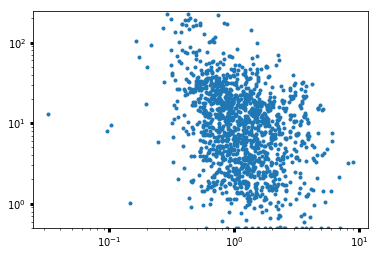

In [56]:
filename = "all_vortices_2020Aug9.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)
print(data.dtype.names)

plt.loglog(data['DeltaP'], data['Gamma'], marker='.', ls='')
print(np.min(data['Gamma']))
plt.ylim([0.5, 250])